**Kết nối với Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Tìm các siêu tham số tối ưu nhất cho thuật toán SVM**

In [ ]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

data = '/content/gdrive/MyDrive/data'

X = []
y = []

for img in os.listdir(data):
  filename = os.path.basename(img)
  if filename.endswith(".png"):
    img = cv2.imread(os.path.join(data, img), 0)
    img = cv2.resize(img, (28, 28))
    img = np.reshape(img, -1)
    if "_" in filename:
        label = int(filename.split("_")[0].split("so")[1])
    else:
        label = int(filename.split("so")[1].split(".png")[0])
    X.append(img)
    y.append(label)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 259, random_state = 2)

params = {'C': [0.1, 1, 10, 100],
          'gamma': [0.0001, 0.001, 0.1, 1],
          'kernel': ['rbf', 'poly', 'sigmoid']}

grid_search = GridSearchCV(SVC(), params, refit=True, cv=5)
grid_search.fit(X_train, y_train)

accuracy = grid_search.score(X_test, y_test)
print("Độ chính xác trên tập kiểm tra:", accuracy)

best_params = grid_search.best_params_
print("Siêu tham số tốt nhất: ", best_params)

Độ chính xác trên tập kiểm tra: 0.5585585585585585
Siêu tham số tốt nhất:  {'C': 0.1, 'gamma': 0.0001, 'kernel': 'poly'}


**Thuật toán SVM**

Saving so4_404.png to so4_404.png


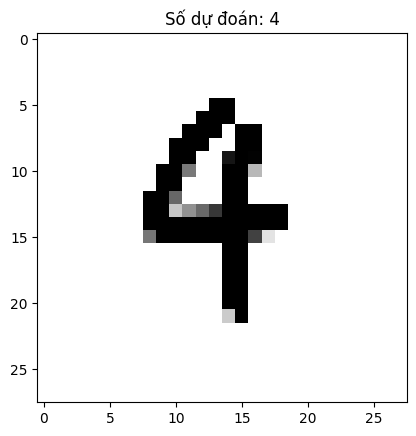

In [ ]:
import os
import re
import cv2
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from sklearn import svm

du_lieu_huan_luyen = '/content/gdrive/MyDrive/train_ct'

X_train = []
y_train = []

for img in os.listdir(du_lieu_huan_luyen):
  filename = os.path.basename(img)

  if filename.endswith(".png"):
    image = cv2.imread(os.path.join(du_lieu_huan_luyen, filename), 0)
    image = cv2.resize(image, (28, 28))
    image_vector = image.reshape(-1)
    if "_" in filename:
      label = int(filename.split("_")[0].split("so")[1])
    else:
      label = int(filename.split("so")[1].split(".png")[0])
    X_train.append(image_vector)
    y_train.append(label)

model = svm.SVC(kernel='poly', C = 0.1, gamma = 0.0001)
X_train_array = np.array(X_train)
model.fit(X_train_array, y_train)

uploaded = files.upload()

for img_path in list(uploaded.keys()):

    image = cv2.imread(img_path, 0)
    image = cv2.resize(image, (28, 28))

    image_vector = image.reshape(1,-1)

    so_du_doan = model.predict(image_vector)

    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title(f'Số dự đoán: {so_du_doan[0]}')

plt.show()

